### 1.0 Libraries

In [214]:
import pandas
import matplotlib.pyplot 
import numpy 
from scipy.stats import chi2_contingency
import scipy.stats as stats
import statsmodels.api as sm

from Bio import SeqIO
from Bio.KEGG import REST
from urllib.error import HTTPError


### 2.0 Importing data, reading them as a Pandas dataframe and storing them in a library

In [181]:
file_paths = {
    'MTOR' : '/Users/jaydee/Desktop/Genomics and Bioinformatics/Final Project - DNA REPAIR files/MTOR.txt',
    'Raptor': '/Users/jaydee/Desktop/Genomics and Bioinformatics/Final Project - DNA REPAIR files/Raptor.txt',
    'PRAS40': '/Users/jaydee/Desktop/Genomics and Bioinformatics/Final Project - DNA REPAIR files/PRAS40.txt',
    'MLST8': '/Users/jaydee/Desktop/Genomics and Bioinformatics/Final Project - DNA REPAIR files/MLST8.txt',
    'Telomere_maintenance2': '/Users/jaydee/Desktop/Genomics and Bioinformatics/Final Project - DNA REPAIR files/Telomere_maintenance2.txt',
    'Tel_interacting_protein1': '/Users/jaydee/Desktop/Genomics and Bioinformatics/Final Project - DNA REPAIR files/Tel_interacting_protein1.txt',
    'Mapkap1': '/Users/jaydee/Desktop/Genomics and Bioinformatics/Final Project - DNA REPAIR files/Mapkap1.txt',
    'Rictor': '/Users/jaydee/Desktop/Genomics and Bioinformatics/Final Project - DNA REPAIR files/Rictor.txt',
    'Deptor': '/Users/jaydee/Desktop/Genomics and Bioinformatics/Final Project - DNA REPAIR files/Deptor.txt'
}

data = {}

for name, file_path in file_paths.items():
    data[name] = pandas.read_csv(file_path, delimiter = '\t', header=0)


data['MTOR']


,pub_og_id,og_name,level_taxid,organism_taxid,organism_name,pub_gene_id,description
0,1372383at33208,SMG1 nonsense mediated mRNA decay associated P...,33208,10228_0,Trichoplax adhaerens,TRIADDRAFT_60833,Non-specific serine/threonine protein kinase
1,1372383at33208,SMG1 nonsense mediated mRNA decay associated P...,33208,10228_0,Trichoplax adhaerens,TRIADDRAFT_57462,Serine/threonine-protein kinase TOR
2,1372383at33208,SMG1 nonsense mediated mRNA decay associated P...,33208,400682_0,Amphimedon queenslandica,100641883,Non-specific serine/threonine protein kinase
3,1372383at33208,SMG1 nonsense mediated mRNA decay associated P...,33208,400682_0,Amphimedon queenslandica,LOC100633443,serine/threonine-protein kinase mTOR-like
4,1372383at33208,SMG1 nonsense mediated mRNA decay associated P...,33208,400682_0,Amphimedon queenslandica,LOC109585608,serine/threonine-protein kinase mTOR-like
...,...,...,...,...,...,...,...
1870,1372383at33208,SMG1 nonsense mediated mRNA decay associated P...,33208,8154_0,Astatotilapia calliptera,mtor,serine/threonine-protein kinase mTOR isoform X1
1871,1372383at33208,SMG1 nonsense mediated mRNA decay associated P...,33208,106582_0,Maylandia zebra,smg1,serine/threonine-protein kinase SMG1 isoform X1
1872,1372383at33208,SMG1 nonsense mediated mRNA decay associated P...,33208,106582_0,Maylandia zebra,mtor,Serine/threonine-protein kinase TOR
1873,1372383at33208,SMG1 nonsense mediated mRNA decay associated P...,33208,7222_0,Drosophila grimshawi,Dgri\GH11387,Serine/threonine-protein kinase TOR


### 3.0 Filtering Pandas library

Here, I match the organism name to it's organism tax id. I use the organism tax id as a reference to count how many times that specie appear in gene pandas library.

In [175]:
organism_names = {
    'Humans': 'Homo sapiens',
    'Mice': 'Mus musculus',
    'Fruit Flies': 'Drosophila melanogaster',
    'Roundworms': 'Caenorhabditis elegans',
    'Zebrafish': 'Danio rerio',
    'Sea Anemones': 'Nematostella vectensis',
    'Sponges': 'Amphimedon queenslandica',
    'Sea Urchins': 'Strongylocentrotus purpuratus',
    'Hydra': 'Hydra vulgaris',
    'Chickens': 'Gallus gallus',
    'African Clawed Frog': 'Xenopus laevis',
    'Domestic Pig': 'Sus scrofa domesticus',
    'Domestic Cow': 'Bos taurus',
    'African Elephant': 'Loxodonta africana'
}

filtered_data = {}

for key, df in data.items():
    if 'organism_name' in df.columns:
        filtered_data[key] = df[df['organism_name'].isin(organism_names.values())]

species_set = set()
for df in filtered_data.values():
    species_set.update(df['organism_name'].unique())

table_data = {}

for key, df in filtered_data.items():
    organism_counts = df['organism_name'].value_counts().apply(lambda x: min(x, 2))
    table_data[key] = organism_counts

for species in species_set:
    for key, df in filtered_data.items():
        if species not in df['organism_name'].values:
            table_data[key].loc[species] = 0

table = pandas.DataFrame(table_data).fillna(0).astype(int)

table


,MTOR,Raptor,PRAS40,MLST8,Telomere_maintenance2,Tel_interacting_protein1,Mapkap1,Rictor,Deptor
Amphimedon queenslandica,2,1,0,1,1,2,1,2,2
Bos taurus,2,1,1,1,1,1,1,1,1
Caenorhabditis elegans,1,1,0,1,0,1,1,0,0
Danio rerio,2,1,1,1,1,1,1,2,2
Drosophila melanogaster,2,1,0,1,0,1,1,1,0
Gallus gallus,2,1,0,1,1,1,1,1,2
Homo sapiens,2,1,1,1,1,1,2,1,1
Hydra vulgaris,2,1,0,1,1,1,1,1,1
Loxodonta africana,2,2,1,1,1,1,1,1,1
Mus musculus,2,2,2,1,1,1,2,2,1


### It seems like Sus scrofa domesticus does not have any of the genes within the MTOR complexes. Therefore, analysis moving forward, that organism will be excluded.
### To make sure, see result below when filtering.

In [180]:
for key, df in filtered_data.items():
    print(f"Organism_taxids for {key}:")
    organism_taxids = df[df['organism_name'].isin(organism_names.values())]['organism_taxid']
    if organism_taxids.empty:
        print("Organism name not found.")
    else:
        print(organism_taxids)
    for organism_name in organism_names.values():
        if organism_name not in df['organism_name'].values:
            #print(f"{organism_name} not found in {key}.")
    print()


IndentationError: expected an indented block (3371337546.py, line 11)

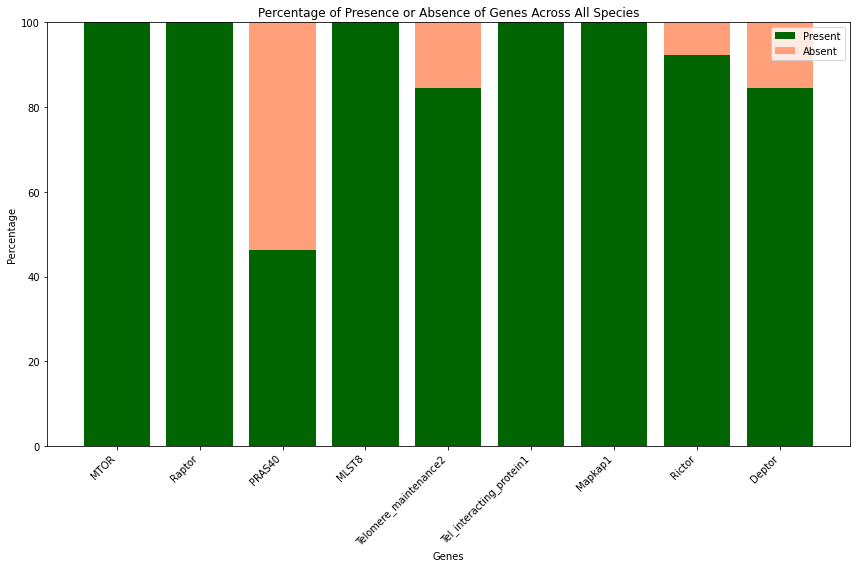

In [177]:
if 'Sus scrofa domesticus' in table.index:
    table_filtered = table.drop('Sus scrofa domesticus', axis = 0)
else:
    table_filtered = table.copy()

total_species = len(table_filtered)
presence_percentage = (table_filtered > 0).sum() / total_species * 100
absence_percentage = (table_filtered == 0).sum() / total_species * 100

# Create a stacked bar plot
matplotlib.pyplot.figure(figsize = (12, 8))
matplotlib.pyplot.bar(table_filtered.columns, presence_percentage, color = 'darkgreen', label = 'Present')
matplotlib.pyplot.bar(table_filtered.columns, absence_percentage, bottom = presence_percentage, color = 'lightsalmon', label = 'Absent')
matplotlib.pyplot.xlabel('Genes')
matplotlib.pyplot.ylabel('Percentage')
matplotlib.pyplot.title('Percentage of Presence or Absence of Genes Across All Species')
matplotlib.pyplot.xticks(rotation = 45, ha = 'right')
matplotlib.pyplot.legend()
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


### 4. Chi-Squared Test 

In [178]:
for key, df in filtered_data.items():
    organism_counts = df['organism_name'].value_counts()
    table_data[key] = organism_counts

for species in species_set:
    for key, df in filtered_data.items():
        if species not in df['organism_name'].values:
            table_data[key].loc[species] = 0

summary_table = pandas.DataFrame(table_data).fillna(0).astype(int)

summary_table

,MTOR,Raptor,PRAS40,MLST8,Telomere_maintenance2,Tel_interacting_protein1,Mapkap1,Rictor,Deptor
Amphimedon queenslandica,7,1,0,1,1,2,1,4,2
Bos taurus,2,1,1,1,1,1,1,1,1
Caenorhabditis elegans,1,1,0,1,0,1,1,0,0
Danio rerio,2,1,1,1,1,1,1,2,2
Drosophila melanogaster,2,1,0,1,0,1,1,1,0
Gallus gallus,2,1,0,1,1,1,1,1,2
Homo sapiens,3,1,1,1,1,1,2,1,1
Hydra vulgaris,2,1,0,1,1,1,1,1,1
Loxodonta africana,2,2,1,1,1,1,1,1,1
Mus musculus,2,2,2,1,1,1,2,2,1


chi2, p_val, dof, ex = chi2_contingency(summary_table)

print(f"Chi2 value: {chi2}")
print(f"P-value: {p_val}")
print(f"Degrees of freedom: {dof}")
6104

In [172]:
table = numpy.array([[7, 2, 1, 2, 2, 2, 3, 2, 2, 3, 3],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
                  [2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1],
                  [1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2],
                  [4, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2],
                  [2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 5]])
    


array([[7, 2, 1, 2, 2, 2, 3, 2, 2, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
       [2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1],
       [1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2],
       [4, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2],
       [2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 5]])

In [196]:
species_list = ['hsa', 'mmu', 'dme', 'dre',
               'nve', 'aqu', 'spu', 'hmg', 
               'gga', 'xla', 'ssc', 'bta', 'lav']

for species in species_list:
    try:
        gene_list = REST.kegg_link(species, "K07203").read()
        gene_ids = [line.split("\t")[1] for line in gene_list.split("\n") if line]
        for gene_id in gene_ids:
            try:
                fasta = REST.kegg_get(gene_id, "aaseq").read()
                with open(f"{species}_{gene_id}.fasta", "w") as file:
                    file.write(fasta)

                num_sequences = fasta.count('>')
                print(f"Number of sequences retrieved for {species}, {gene_id}: {num_sequences}")
            except HTTPError:
                print(f"Unable to retrieve sequence for {species}, {gene_id}")
    except HTTPError:
        print(f"Unable to retrieve gene list for {species}")

Number of sequences retrieved for hsa, hsa:2475: 1
Number of sequences retrieved for mmu, mmu:56717: 1
Number of sequences retrieved for dme, dme:Dmel_CG5092: 1
Number of sequences retrieved for dre, dre:324254: 1
Number of sequences retrieved for nve, nve:5517009: 1
Number of sequences retrieved for aqu, aqu:100633443: 1
Number of sequences retrieved for spu, spu:580879: 1
Number of sequences retrieved for hmg, hmg:100197178: 1
Number of sequences retrieved for gga, gga:419455: 1
Number of sequences retrieved for xla, xla:108696363: 1
Number of sequences retrieved for ssc, ssc:100127359: 1
Number of sequences retrieved for bta, bta:100139219: 1
Number of sequences retrieved for lav, lav:100660112: 1


In [201]:
species_list = ['hsa', 'mmu', 'dme', 'cel', 
                  'dre', 'nve', 'aqu', 'spu', 
                  'hmg', 'gga', 'xla', 'ssc', 
                  'bta', 'lav', 'rno', 'oas', 
                  'ocu', 'ecb', 'chx', 'fca', 
                  'cfa', 'cav', 'cjc', 'mcc', 
                  'ptr', 'pon', 'ggo', 'bbub', 
                  'maua', 'nle', 'etf', 'dnm', 
                  'pcla', 'pwc', 'shr', 'ccat', 
                  'hcg', 'tca', 'obi', 'cgi', 
                  'ola', 'mmer', 'svg', 'ccar', 
                  'pma', 'pmoa', 'tgu', 'cbrc', 
                  'mdo', 'acs', 'lcm', 'gat', 
                  'omy', 'xma', 'amex', 'hro']


In [ ]:
ko_entries = ['K07203', 'K07204', 'K16184', 'K08266', 'K11137', 'K20403', 'K08267', 'K20403', 'K20402']

for ko in ko_entries:
    with open(f"{ko}.fasta", "w") as ko_file:
        for species in species_list:
            try:
                gene_list = REST.kegg_link(species, ko).read()
                gene_ids = [line.split("\t")[1] for line in gene_list.split("\n") if line]

                for gene_id in gene_ids:
                    try:
                        fasta = REST.kegg_get(gene_id, "aaseq").read()
                        ko_file.write(fasta)
                        num_sequences = fasta.count('>')
                        print(f"Number of sequences retrieved for {species}, {gene_id}: {num_sequences}")
                    except HTTPError:
                        print(f"Unable to retrieve sequence for {species}, {gene_id}")
            except HTTPError:
                print(f"Unable to retrieve gene list for {species}")

In [ ]:
organism_codes = {
    'Homo sapiens': 'hsa',
    'Mus musculus': 'mmu',
    'Drosophila melanogaster': 'dme',
    'Caenorhabditis elegans': 'cel',
    'Danio rerio': 'dre',
    'Nematostella vectensis': 'nve',
    'Amphimedon queenslandica': 'aqu',
    'Strongylocentrotus purpuratus': 'spu',
    'Hydra vulgaris': 'hmg',
    'Gallus gallus': 'gga',
    'Xenopus laevis': 'xla',
    'Sus scrofa domesticus': 'ssc',
    'Bos taurus': 'bta',
    'Loxodonta africana': 'lav',
    'Rattus norvegicus': 'rno',
    'Ovis aries': 'oas',
    'Oryctolagus cuniculus': 'ocu',
    'Equus caballus': 'ecb',
    'Capra hircus': 'chx',
    'Felis catus': 'fca',
    'Canis lupus familiaris': 'cfa',
    'Cavia porcellus': 'cav',
    'Callithrix jacchus': 'cjc',
    'Macaca mulatta': 'mcc',
    'Pan troglodytes': 'ptr',
    'Pongo pygmaeus': 'pon',
    'Gorilla gorilla': 'ggo',
    'Bubalus bubalis': 'bbub',  
    'Mesocricetus auratus': 'maua',  
    'Nomascus leucogenys': 'nle',  
    'Echinops telfairi': 'etf',  
    'Dasypus novemcinctus': 'dnm',  
    'Procavia capensis': 'pcla',  
    'Phascolarctos cinereus': 'pwc',  
    'Sarcophilus harrisii': 'shr',  
    'Ceratitis capitata': 'ccat',  
    'Hemidactylus capensis': 'hcg',  
    'Tribolium castaneum': 'tca',
    'Octopus vulgaris': 'obi',  
    'Crassostrea gigas': 'cgi',
    'Oryzias latipes': 'ola',
    'Mercenaria mercenaria': 'mmer',  
    'Sturnus vulgaris': 'svg', 
    'Cyprinus carpio': 'ccar',  
    'Parus major': 'pma',  
    'Passer motanus': 'pmoa', 
    'Taeniopygia guttata': 'tgu',
    'Corvus brachyrhynchos': 'cbrc',
    'Monodelphis domestica': 'mdo', 
    'Anolis carolinensis': 'acs', 
    'Latimeria chalumnae': 'lcm', 
    'Gasterosteus aculeatus': 'gat', 
    'Oncorhynchus mykiss': 'omy', 
    'Xiphophorus maculatus': 'xma', 
    'Astyanax mexicanus': 'amex', 
    'Helobdella robusta': 'hro',
}

Exception: Job failed: <?xml version='1.0' encoding='UTF-8'?>
<error>
 <description>Job 'clustalo-R20230515-222809-0814-95341906-p1m' is still queued</description>
</error>